(388, 291, 3)


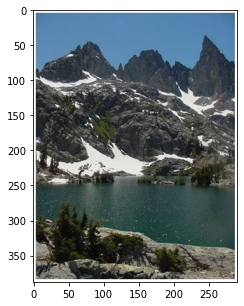

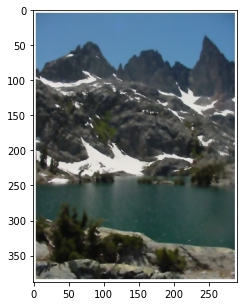

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def gaussSpace(k,sigma):
    s = np.arange(-int(k/2),int(k/2)+1)
    s = np.exp(-(s**2)/(2*sigma*sigma))
    s = s.reshape(-1,1)@s.reshape(1,-1)
    return s
def bilateralFilterImp(img,k,x,y,sigma_s,sigma_r):
    ans = np.zeros((x,y))
    kh = int(k/2)
    for i in range(kh,kh+x):
        for j in range(kh,kh+y):
            space_s = gaussSpace(k,sigma_s)
            img_sr = img[i-kh:i+kh+1,j-kh:j+kh+1]
            rr = img_sr - img[i,j]
            range_r = np.exp(-(rr**2)/(2*sigma_r*sigma_r))
            sr_filter = np.multiply(space_s,range_r)
            sr_filter = sr_filter/np.sum(sr_filter)
            ans[i-kh,j-kh] = np.sum(np.multiply(sr_filter,img_sr))
    return ans
def bilateralFilterPreProcessing(img, kernel_size, sigma_s, sigma_r):
    img = img.astype(np.float64)
    cartoon = np.zeros(img.shape)
    kh = int(kernel_size/2)
    x = img.shape[0]
    y = img.shape[1]
    for i in range(3):
        temp = np.zeros((x+kernel_size-1,y+kernel_size-1))
        temp[kh:kh+x,kh:kh+y] = img[:,:,i]
        cartoon[:,:,i] = bilateralFilterImp(temp,kernel_size,x,y,sigma_s,sigma_r)
    return cartoon
    
sky = cv2.imread("../images/mountain.jpg")
print(sky.shape)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(sky, cv2.COLOR_RGB2BGR))
plt.show()
plt.figure(figsize=(5,5))
bi_sky = bilateralFilterPreProcessing(sky,5,2,50).astype(np.uint8)
bi_sky = cv2.cvtColor(bi_sky, cv2.COLOR_RGB2BGR)
plt.imshow(bi_sky)
plt.show()


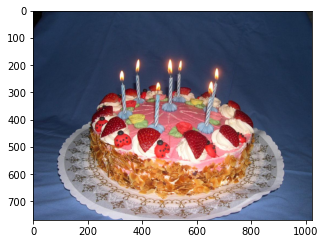

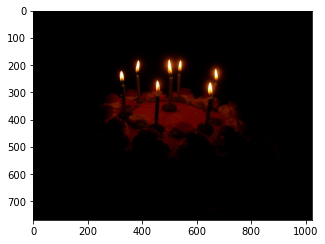

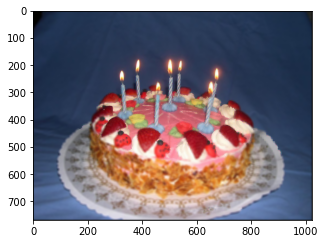

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def gaussSpace(k,sigma):
    s = np.arange(-int(k/2),int(k/2)+1)
    s = np.exp(-(s**2)/(2*sigma*sigma))
    s = s.reshape(-1,1)@s.reshape(1,-1)
    return s
def crossBilateralFilterImp(img1,img2,k,x,y,sigma_s,sigma_r):
    ans = np.zeros((x,y))
    kh = int(k/2)
    for i in range(kh,kh+x):
        for j in range(kh,kh+y):
            space_s = gaussSpace(k,sigma_s)
            img_sr = img2[i-kh:i+kh+1,j-kh:j+kh+1]
            act_img_sr = img1[i-kh:i+kh+1,j-kh:j+kh+1]
            rr = img_sr - img2[i,j]
            range_r = np.exp(-(rr**2)/(2*sigma_r*sigma_r))
            sr_filter = np.multiply(space_s,range_r)
            sr_filter = sr_filter/np.sum(sr_filter)
            ans[i-kh,j-kh] = np.sum(np.multiply(sr_filter,act_img_sr))
    return ans
def crossBilateralFilterPreProcessing(img1,img2, kernel_size, sigma_s, sigma_r):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    cartoon = np.zeros(img1.shape)
    kh = int(kernel_size/2)
    x = img1.shape[0]
    y = img1.shape[1]
    for i in range(3):
        temp1 = np.zeros((x+kernel_size-1,y+kernel_size-1))
        temp2 = np.zeros((x+kernel_size-1,y+kernel_size-1))
        temp1[kh:kh+x,kh:kh+y] = img1[:,:,i]
        temp2[kh:kh+x,kh:kh+y] = img2[:,:,i]
        cartoon[:,:,i] = crossBilateralFilterImp(temp1,temp2,kernel_size,x,y,sigma_s,sigma_r)
    return cartoon
    
flash = cv2.imread("../images/cake_flash.jpg")
no_flash = cv2.imread("../images/cake_noflash.jpg")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(flash, cv2.COLOR_RGB2BGR))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(no_flash, cv2.COLOR_RGB2BGR))
plt.show()
plt.figure(figsize=(5,5))
cross_bi = crossBilateralFilterPreProcessing(flash,no_flash,9,10,0.5).astype(np.uint8)
cross_bi = cv2.cvtColor(cross_bi, cv2.COLOR_RGB2BGR)
plt.imshow(cross_bi)
plt.show()

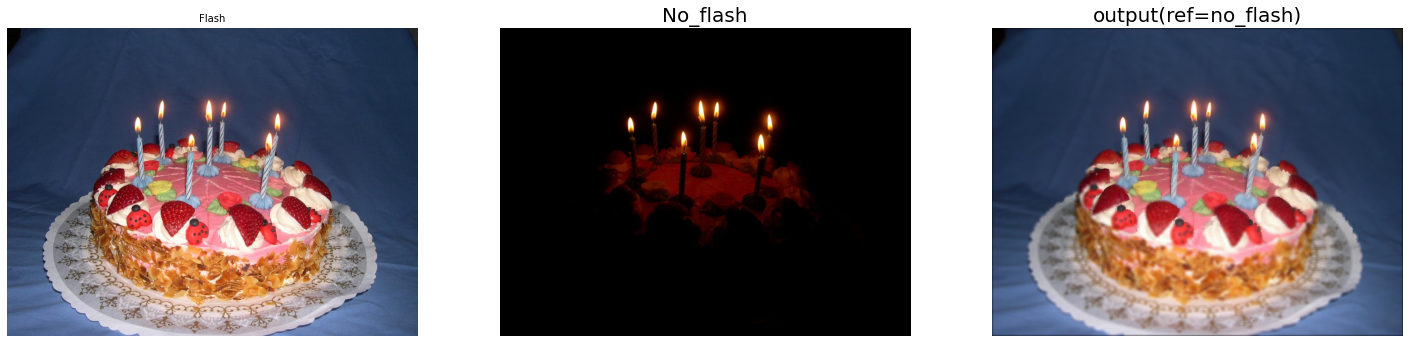

In [4]:
img_rgb = cv2.cvtColor(flash,cv2.COLOR_BGR2RGB)
ref_rgb = cv2.cvtColor(no_flash,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(25,20))
plt.subplot(1,3,1)
plt.title("Flash",fontsize=10)
plt.imshow(img_rgb)
plt.axis('off')
plt.subplot(1,3,2)
plt.title("No_flash",fontsize=20)
plt.imshow(ref_rgb)
plt.axis('off')
plt.subplot(1,3,3)
plt.title("output(ref=no_flash)",fontsize=20)
plt.imshow(cross_bi
          )
plt.axis('off')
plt.show()